# TUMOR RESİMLERİNİN BULUNDUĞU KLASORDE KAÇ RESİM OLDUĞUNUN TESPİTİ 

In [2]:
import os

# Ana klasör yolu
main_folder_path = 'TUMOR'

# Toplam resim sayacı
total_image_count = 0

# Her alt klasör için resim sayısını saklamak için sözlük
image_counts_per_folder = {}

# Ana klasördeki her alt klasörü kontrol et
for sub_folder_name in os.listdir(main_folder_path):
    sub_folder_path = os.path.join(main_folder_path, sub_folder_name)
    
    # Eğer bu bir klasörse
    if os.path.isdir(sub_folder_path):
        # Alt klasördeki resim sayısını hesapla
        image_count = len([file for file in os.listdir(sub_folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        
        # Alt klasörün adını ve resim sayısını sözlüğe ekle
        image_counts_per_folder[sub_folder_name] = image_count
        
        # Toplam resim sayısını güncelle
        total_image_count += image_count

# Sonuçları yazdır
print("Her alt klasördeki resim sayısı:")
for folder, count in image_counts_per_folder.items():
    print(f"{folder}: {count} resim")

print(f"\nToplam resim sayısı: {total_image_count}")


Her alt klasördeki resim sayısı:
glioma: 1621 resim
meningioma: 1645 resim
notumor: 2000 resim
pituitary: 1757 resim

Toplam resim sayısı: 7023


# Harris Detection Algoritması ile Köşe Tespiti

In [ ]:
import cv2
import os

# Ana klasör yolu (görüntülerin bulunduğu ana dizin)
main_folder = 'tumor'

# Her bir alt klasörü gez
for subdir in os.listdir(main_folder):
    subdir_path = os.path.join(main_folder, subdir)
    
    # Eğer alt klasörse işlemlere devam et
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, filename)
            
            # Görüntüyü yükle
            img = cv2.imread(img_path)
            
            # Görüntünün doğru yüklendiğinden emin ol
            if img is None:
                print(f"Görüntü yüklenemedi: {img_path}")
                continue
            
            # Görüntüyü gri tonlamaya çevir
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Harris köşe algılama algoritmasını uygula
            gray = cv2.cornerHarris(
                gray,          # Gri tonlama formatındaki giriş görüntüsü
                blockSize=2,   # Her piksel için kendisine komşu diğer 3 pikselde analiz edilir
                ksize=3,       # Sobel türevlerini(bir görüntünün kenarlarını veya yoğunluk değişimlerini belirlemek için türev hesaplaması 
                               # yapan bir görüntü işleme tekniği) hesaplamak için kullanılan pencere boyutu (örneğin 3x3)
                k=0.04         # Harris köşe algılama formülü için sabit (genelde 0.04 ile 0.06 arasında)
            )
            
            # Sonuçları belirgin hale getir (Köşe noktalarını kırmızı ile işaretle)
            # 0.01 * gray.max() = eşik değeri,yüksek çözünürlükteki fotoğraflarda daha düşük bir eşik değeri seçilirken düşük çözünürlüklü 
            # fotolarda daha yüksek bireşik değeri seçilmelidir. 
            img[gray > 0.01 * gray.max()] = [0, 0, 255]
            
            # Çıktı görüntüsünü kaydetmek için bir klasör oluştur
            output_path = os.path.join('harris_kose_algilama', subdir)
            os.makedirs(output_path, exist_ok=True)
            
            # Sonuçları kaydet
            cv2.imwrite(os.path.join(output_path, filename), img)


# Her turden tumor çeşidinden 1 tane olacak şekilde harris detection uygulanmış resimin gosterilmesi

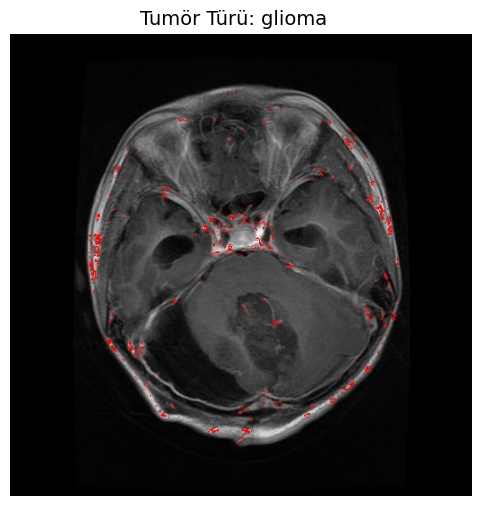

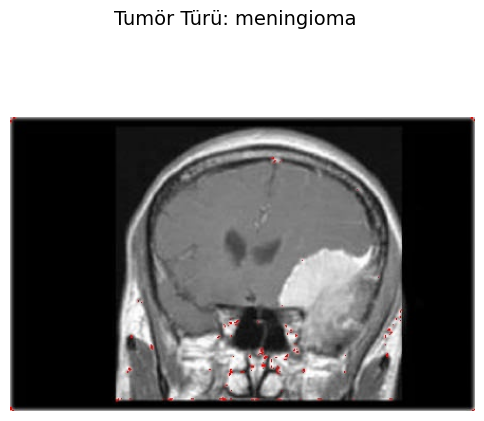

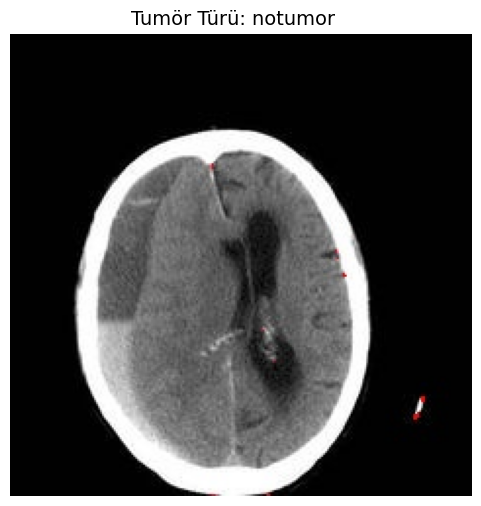

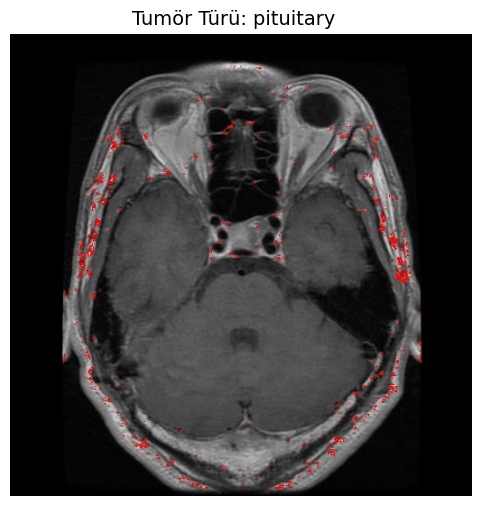

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

# Harris işleminden sonra kaydedilen klasör yolu
processed_folder = 'harris_kose_algilama'

# Gösterilecek her klasörden yalnızca ilk resmi alalım
for subdir in os.listdir(processed_folder):
    subdir_path = os.path.join(processed_folder, subdir)
    
    if os.path.isdir(subdir_path):
        # Alt klasördeki ilk resmi seç
        filename = os.listdir(subdir_path)[0]
        img_path = os.path.join(subdir_path, filename)
        
        # Resmi oku
        img = cv2.imread(img_path)
        
        # Resmi göster
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        # Türü başlık olarak ekleyelim
        plt.suptitle(f"Tumör Türü: {subdir}", fontsize=14, y=0.92)  # Başlığı grafik dışına ekle

        plt.show()


# Harris Detection Algoritmasına Sokulmuş Resimlerin Alt Klasör İsimlerinin Alınması

In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor

# Harris köşe algılama resimlerinin bulunduğu ana klasör yolu
root_dir = 'harris_kose_algilama'

# Alt klasörlerin isimlerini al
subfolders = [f.path for f in os.scandir(root_dir) if f.is_dir()]


# Bir resmi işleyen ve piksel verilerini ve etiketi döndüren fonksiyonun fonksiyonunun tasarlanması

In [2]:
def process_image(image_path, label):
     """Bir resmi işleyen ve piksel verilerini ve etiketi döndüren fonksiyon."""
     try:
         # Görüntüyü gri tonlamalı olarak oku
         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

         # Görüntü okunamazsa hata mesajı yazdır ve None döndür
         if image is None:
             print(f"Resim okunamadı: {image_path}")
             return None

         # Görüntüyü 100x100 piksel boyutuna yeniden boyutlandır
         image = cv2.resize(image, (100, 100))

         # Görüntü piksel değerlerini tek bir düz liste haline getir
         pixels = image.flatten()

         # Piksel verilerine sınıf etiketini ekle ve döndür
         row = np.append(pixels, label)
         return row

     except Exception as e:
         # Herhangi bir hata oluşursa hata mesajı yazdır
         print(f"Hata: {e} - Dosya: {image_path}")
         return None

# Alt klasörlerin belirli bir aralığını işleyen ve veriyi CSV dosyasına kaydeden fonksiyon.

In [4]:
def process_and_save_partial_data(subfolders, start_index, end_index, partial_csv_path):
     """Alt klasörlerin belirli bir aralığını işleyen ve veriyi CSV dosyasına kaydeden fonksiyon."""
     partial_folders = subfolders[start_index:end_index]  # İşlenecek alt klasörleri seç
     all_data = []  # Tüm verileri tutacak liste

     # Paralel işleme için ThreadPoolExecutor kullanıyoruz
     with ThreadPoolExecutor() as executor:
         # Alt klasörleri paralel olarak işleyerek sonuçları al
         results = executor.map(process_subfolder, partial_folders)

     # Tüm sonuçları birleştir
     for result in results:
         all_data.extend(result)

     # Eğer veri varsa, DataFrame oluştur ve CSV dosyasına kaydet
     if all_data:
         # Sütun başlıkları piksel verilerinin sırası ve 'Label' etiketi olacak şekilde oluşturulur
         columns = [f'pixel_{i+1}' for i in range(len(all_data[0]) - 1)] + ['Label']
         df = pd.DataFrame(all_data, columns=columns)  # DataFrame oluştur
         df.to_csv(partial_csv_path, index=False)  # Veriyi CSV dosyasına kaydet
         print(f"{partial_csv_path} kaydedildi.")
     else:
         print(f"{partial_csv_path} için işlenecek veri bulunamadı!")

# Bir alt klasördeki tüm resimleri işleyen ve verileri döndüren fonksiyon.

In [3]:
def process_subfolder(subfolder):
     """Bir alt klasördeki tüm resimleri işler ve veriyi döndüren fonksiyon."""
     label = os.path.basename(subfolder)  # Alt klasör adı, etiket olarak kullanılacak
     images = os.listdir(subfolder)  # Alt klasördeki resim dosyalarını al

     # Eğer alt klasör boşsa, uyarı ver
     if not images:
         print(f"{subfolder} alt klasörü boş!")
    
     data = []  # İşlenecek resimlerin verilerini tutacak liste
     for image_name in images:
         image_path = os.path.join(subfolder, image_name)  # Resmin tam yolu
         result = process_image(image_path, label)  # Resmi işleyerek sonucu al
         if result is not None:
             data.append(result)  # Eğer işleme başarılıysa veriyi listeye ekle
    
     # Alt klasörde işlenen resim sayısını yazdır
     print(f"{subfolder} alt klasöründe {len(data)} resim işlendi.")
     return data

In [5]:
def main():
     """Ana fonksiyon, verileri işleyerek parçalara ayırır ve kaydeder."""
     total_folders = len(subfolders)  # Alt klasörlerin toplam sayısı
     chunk_size = 10  # Aynı anda işlenecek alt klasör sayısı
     for i in range(0, total_folders, chunk_size):
         start_index = i
         end_index = min(i + chunk_size, total_folders)  # İşlenecek alt klasör aralığı
         partial_csv_path = f"harris_kose_pixelli_veri_seti.csv"  # Veriyi kaydedeceğimiz CSV dosyasının yolu
         process_and_save_partial_data(subfolders, start_index, end_index, partial_csv_path)  # Veriyi işleyip kaydet

     print("Tüm veri işlendi ve parçalara ayrıldı!")  # Tüm verinin işlendiği mesajı
     print(f"Toplam {total_folders} alt klasör işlendi.")  # İşlenen alt klasör sayısı

if __name__ == "__main__":
     main()  # Ana fonksiyonu çalıştır

harris_kose_algilama\glioma alt klasöründe 1621 resim işlendi.
harris_kose_algilama\meningioma alt klasöründe 1645 resim işlendi.
harris_kose_algilama\pituitary alt klasöründe 1757 resim işlendi.
harris_kose_algilama\notumor alt klasöründe 2000 resim işlendi.
harris_kose_pixelli_veri_seti.csv kaydedildi.
Tüm veri işlendi ve parçalara ayrıldı!
Toplam 4 alt klasör işlendi.


# Veri setinin yüklenmesi

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1. Veri Setini Yükleme
file_path = "harris_kose_pixelli_veri_seti.csv"  # CSV dosya yolu
data = pd.read_csv(file_path)

# Özellik ve hedef değişken olarak bölünür veri seti.

In [3]:
# Özellik ve hedef değişken olarak bölünür veri seti.
X = data.iloc[:, :-1].values  # Piksel değerleri yani özellikleri belirlenir
y = data.iloc[:, -1].values   # Hedef değişkenler belirlenir

# Etiketleri sayısal norma dönüştürme 

In [4]:
# Etiketleri Sayısal Forma Dönüştürme
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalizasyon işlemleri

In [5]:
# Piksel Değerlerini Normalleştirme (0-255 -> 0-1 aralığı)
X = X / 255.0

# Görüntü boyutunu hesaplayıp yeniden şekillendirme

In [6]:
# Görüntü boyutunu hesaplayıp yeniden şekillendirme
image_size = int(np.sqrt(X.shape[1]))  # Piksel sayısının karekökünü alarak görüntü boyutunu hesapla
X = X.reshape(-1, image_size, image_size, 1)  # Görüntüleri yeniden şekillendir: her görüntü image_size x image_size boyutunda ve 
                                              # tek kanallı (grayscale) olacak

# Veri setini eğitim ve test seti olarak ayırma

In [7]:
from sklearn.model_selection import train_test_split

# X ve y, sırasıyla özellikler (input features) ve etiketler (labels) olmak üzere tanımlanmalıdır.
# X: Özellikler (input features)
# y: Etiketler (labels)

X_train, X_test, y_train, y_test = train_test_split(
    X,  # Özellikler
    y,  # Etiketler
    test_size=0.2,  # Test setinin verinin %20'si kadar olmasını sağlar.
    random_state=42,  # Sonuçların her seferinde aynı olmasını sağlar (tekrarlanabilirlik)
    stratify=y  # Verinin sınıflarına göre dengeli bir şekilde ayırma yapar.
)

# X_train ve y_train, eğitim verilerini; X_test ve y_test ise test verilerini içerir.


# CNN MODELİNİ OLUŞTURMA

In [8]:
# 4. CNN Modeli Oluşturma
model1 = models.Sequential([

    # İlk Konvolüsyonel Katman
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    # Conv2D: 32 adet 3x3 filtre (kernel) ile görüntüyü işler, her bir filtre 3x3 boyutunda.
    # activation='relu': ReLU aktivasyon fonksiyonu kullanılır, negatif değerler sıfır yapılır.
    # input_shape=(image_size, image_size, 1): İlk katman, girdi olarak grayscale resimleri kabul eder.
    
    # MaxPooling Katmanı (Boyut küçültme)
    layers.MaxPooling2D((2, 2)),
    # MaxPooling2D: 2x2'lik bir pencereden en yüksek değeri alarak çözünürlüğü düşürür. Bu, modelin öğrenme gücünü artırır.
    
    # İkinci Konvolüsyonel Katman
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Conv2D: 64 adet 3x3 filtre ile tekrar bir işlem yapılır. Görüntüde daha fazla özellik öğrenilir.

    # MaxPooling Katmanı (Boyut küçültme)
    layers.MaxPooling2D((2, 2)),
    # MaxPooling2D: Görüntü boyutunu küçültür, aynı zamanda modelin genelleme kapasitesini artırır.
    
    # Üçüncü Konvolüsyonel Katman
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Conv2D: 128 adet 3x3 filtre kullanılarak daha fazla özellik çıkarımı yapılır. Daha yüksek sayıda filtre, modelin daha karmaşık özellikler öğrenmesini sağlar.

    # Flatten Katmanı (Düzleştirme)
    layers.Flatten(),
    # Flatten: Konvolüsyonel katmanlardan gelen 2D verileri düzleştirerek 1D hale getirir.
    # Bu, verileri tam bağlantılı (dense) katmanlara geçirebilmek için gereklidir.
    
    # Tam Bağlantılı (Dense) Katman
    layers.Dense(128, activation='relu'),
    # Dense: 128 nörondan oluşan bir tam bağlantılı katmandır. Bu katman, öğrenilen özellikleri daha soyut hale getirmek için kullanılır.
    # activation='relu': ReLU aktivasyon fonksiyonu kullanılır.

    # Dropout Katmanı (Aşırı öğrenmeyi engellemek için)
    layers.Dropout(0.5),
    # Dropout: Modelin aşırı öğrenmesini (overfitting) engellemek için, her iterasyonda %50 oranında rastgele bağlantıların kapatılmasını sağlar.
    
    # Çıktı Katmanı
    layers.Dense(len(np.unique(y)), activation='softmax')
    # Dense: Çıktı katmanı, sınıfların sayısı kadar nöron içerir.
    # len(np.unique(y)): Sınıf sayısını belirler, y'nin benzersiz etiket sayısına göre.
    # activation='softmax': Softmax aktivasyon fonksiyonu, her bir sınıfın olasılıklarını hesaplar, bu sayede sınıflandırma yapılabilir.

])


c:\Users\atunc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. Modeli Derleme

In [9]:
# Modeli derlemek için kullanılan compile fonksiyonu:
model1.compile(
    # 'adam' optimizasyon algoritması kullanılır. Bu algoritma, her parametre için ayrı öğrenme hızları kullanarak hızlı ve etkili bir eğitim 
    # sağlar.
    optimizer='adam',
    
    # Kayıp fonksiyonu olarak 'sparse_categorical_crossentropy' seçilmiştir. 
    # Bu, çok sınıflı sınıflandırma problemlerinde, etiketlerin tam sayı formatında olduğu durumlar için uygundur.
    loss='sparse_categorical_crossentropy',  
    
    # Eğitim sırasında modelin doğruluğu (accuracy) takip edilecektir. 
    # Bu metrik, doğru tahmin oranını gösterir ve modelin genel başarısını ölçer.
    metrics=['accuracy']
)


# Modeli eğitme

In [10]:
# Modeli eğitmek için fit fonksiyonu kullanılır.
history = model1.fit(
    # Eğitim verisi: X_train, modelin öğrenmesi için kullanılan giriş (özellik) verisidir.
    # Bu veriler, modelin sınıflandırma yapabilmesi için gerekli olan tüm bilgiyi içerir.
    X_train,  
    
    # Etiketler: y_train, her giriş örneği için doğru sınıf etiketlerini içerir.
    # Bu, modelin doğru tahmin yapabilmesi için gerekli olan hedef değerleri sağlar.
    y_train,  
    
    # Epoch sayısı: Model, tüm eğitim verisi üzerinde kaç kez eğitim yapılacağını belirtir.
    # 100 epoch, modelin 100 kez tüm eğitim verileri üzerinde çalışacağı anlamına gelir.
    epochs=100,  
    
    # Batch size: Modelin her eğitim adımında kullanacağı örnek sayısını belirtir.
    # 144 batch size, her adımda modelin 144 örnek üzerinde çalışacağı anlamına gelir.
    batch_size=144,  
    
    # Validation split: Eğitim verisinin %10'unu doğrulama verisi olarak ayırır.
    # Model bu veriyi, eğitim sırasında doğruluğunu değerlendirmek için kullanacaktır.
    validation_split=0.1
)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 36s 798ms/step - accuracy: 0.4622 - loss: 1.1806 - val_accuracy: 0.7776 - val_loss: 0.5577
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 735ms/step - accuracy: 0.7651 - loss: 0.6125 - val_accuracy: 0.8327 - val_loss: 0.4390
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 747ms/step - accuracy: 0.8133 - loss: 0.4748 - val_accuracy: 0.8772 - val_loss: 0.3367
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 766ms/step - accuracy: 0.8498 - loss: 0.4059 - val_accuracy: 0.8790 - val_loss: 0.3395
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 712ms/step - accuracy: 0.8784 - loss: 0.3226 - val_accuracy: 0.9075 - val_loss: 0.2690
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 719ms/step - accuracy: 0.8996 - loss: 0.2620 - val_accuracy: 0.9110 - val_loss: 0.2378
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 691ms/step - accuracy: 0.9119 - loss: 0.2233 - val_accuracy: 0.9039 - val_loss: 0.2630
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 689ms/step - accuracy: 0.9342 - loss: 0.1720 - 

# Modeli Kaydetme

In [11]:
# 8. Modeli Kaydetme (Opsiyonel)
model1.save("cnn_pixel_model.h5")


# EĞİTİM VE TEST DOĞRULUKLARININ BELİRLENMESİ

In [40]:
# Eğitim seti üzerinde modelin performansını değerlendiriyoruz.
# 'evaluate' fonksiyonu, modelin eğitim verisi üzerinde kayıp (loss) ve doğruluk (accuracy) değerlerini hesaplar.
train_loss, train_accuracy = model1.evaluate(X_train, y_train)

# Test seti üzerinde modelin performansını değerlendiriyoruz.
# 'evaluate' fonksiyonu, modelin test verisi üzerindeki kayıp (loss) ve doğruluk (accuracy) değerlerini hesaplar.
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

# Eğitim setindeki doğruluğu ekrana yazdırıyoruz. Bu, modelin eğitim verisi üzerinde ne kadar doğru tahminlerde bulunduğunu gösterir.
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test setindeki doğruluğu ekrana yazdırıyoruz. Bu, modelin test verisi üzerinde ne kadar doğru tahminlerde bulunduğunu gösterir.
print(f"Test Accuracy: {test_accuracy:.4f}")



176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9999 - loss: 3.3668e-04
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9674 - loss: 0.1850
Training Accuracy: 0.9989
Test Accuracy: 0.9594


# EPOCH SAYISINA GÖRE TEST VE DOĞRULAMA DOĞRULUĞUNUN GRAFİKTE KARŞILAŞTIRILMASI

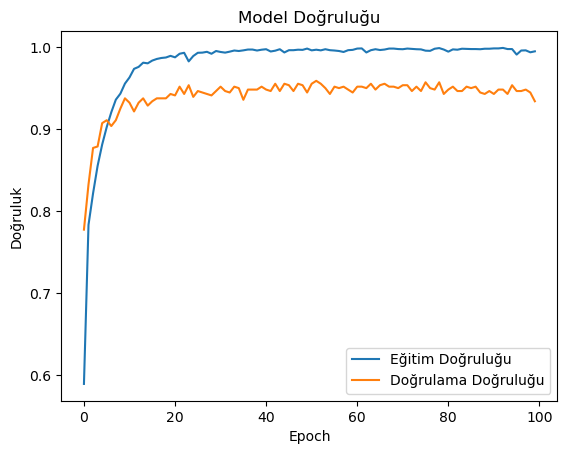

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Model Doğruluğu')
plt.show()


# Loss değerlerinin karşılaştırılması

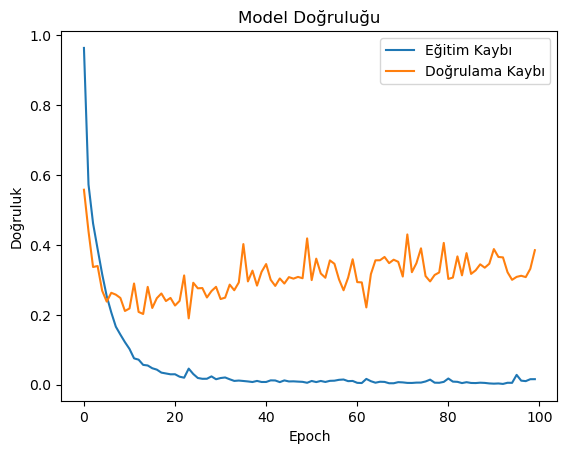

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Model Doğruluğu')
plt.show()

# Fine Tuning İşlemleri

# 1.)Katmanları dondurmak

In [15]:
# 1. Modelin önceki katmanlarını dondur (Frozen)
for layer in model1.layers[:-4]:  # Son 4 katmanı hariç donduruyoruz
    layer.trainable = False  # Bu katmanlar eğitim sırasında güncellenmeyecek

# 2. Modelin son katmanını yeniden derle (compile) ve ince ayar yap

In [16]:


# 2. Modelin son katmanını yeniden derle (compile) ve ince ayar yap
# Son katmanları yeniden eğitmek için modelin compile edilmesi gerekir.
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Daha küçük öğrenme oranı
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

# 3. Modeli yeniden eğit (Fine-Tuning uygulamış model üzerinden)

In [17]:
# 3. Modeli yeniden eğit (Fine-Tuning)
history_finetuned = model1.fit(X_train, y_train,  # Eğitim verisi ile modeli yeniden eğit
                               epochs=50,  # Fine-tuning için 50 epoch
                               batch_size=144,  # Batch boyutunu 144 olarak ayarlıyoruz
                               validation_data=(X_test, y_test),  # Validasyon verisi kullanılarak doğrulama yapılır
                               callbacks=[  # Modelin eğitimini daha verimli hale getirmek için bazı callback fonksiyonları kullanıyoruz
                                   # EarlyStopping, val_loss değişim göstermediği takdirde eğitim durdurulacak
                                   tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),  # patience=5: 5 epoch boyunca val_loss düzelmezse durdur
                                   
                                   # ReduceLROnPlateau, val_loss iyileşmediği zaman öğrenme oranını düşürür
                                   tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Factor=0.5: Öğrenme oranı 0.5 ile çarpılarak düşürülür
                               ])


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.9855 - loss: 0.0587 - val_accuracy: 0.9473 - val_loss: 0.3356 - learning_rate: 1.0000e-05
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9906 - loss: 0.0572 - val_accuracy: 0.9480 - val_loss: 0.3297 - learning_rate: 1.0000e-05
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.9901 - loss: 0.0611 - val_accuracy: 0.9495 - val_loss: 0.3236 - learning_rate: 1.0000e-05
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.9915 - loss: 0.0427 - val_accuracy: 0.9495 - val_loss: 0.3193 - learning_rate: 1.0000e-05
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.9862 - loss: 0.0484 - val_accuracy: 0.9495 - val_loss: 0.3143 - learning_rate: 1.0000e-05
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.9892 - loss: 0.0449 - val_accuracy: 0.9502 - val_loss: 0.3097 - learning_rate: 1.0000e-05
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 

# 4.)Eğitim ve test doğruluklarını yeniden değerlendirme

In [41]:

# 4. Eğitim ve test doğruluklarını yeniden değerlendirme

train_loss, train_accuracy = model1.evaluate(X_train, y_train)

test_loss, test_accuracy = model1.evaluate(X_test, y_test)

# 5. Yeni doğruluk değerlerini yazdırma

print(f"Fine-Tuned Training Accuracy: {train_accuracy:.4f}")

print(f"Fine-Tuned Test Accuracy: {test_accuracy:.4f}")


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9999 - loss: 3.3668e-04
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9674 - loss: 0.1850
Fine-Tuned Training Accuracy: 0.9989
Fine-Tuned Test Accuracy: 0.9594


# EPOCH SAYISINA GÖRE TEST VE DOĞRULAMA DOĞRULUĞUNUN GRAFİKTE KARŞILAŞTIRILMASI

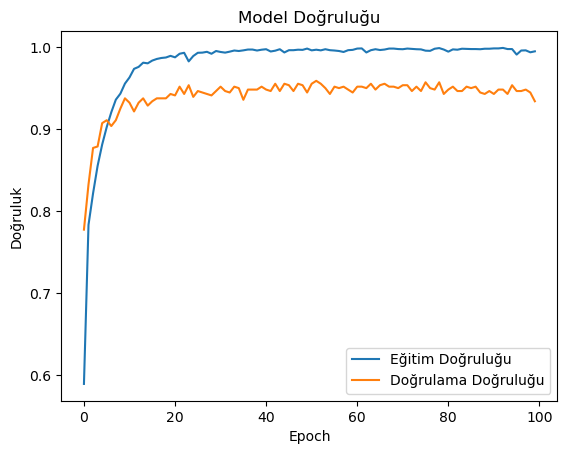

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Model Doğruluğu')
plt.show()


# Loss Değerlerinin Karşılaştırılması

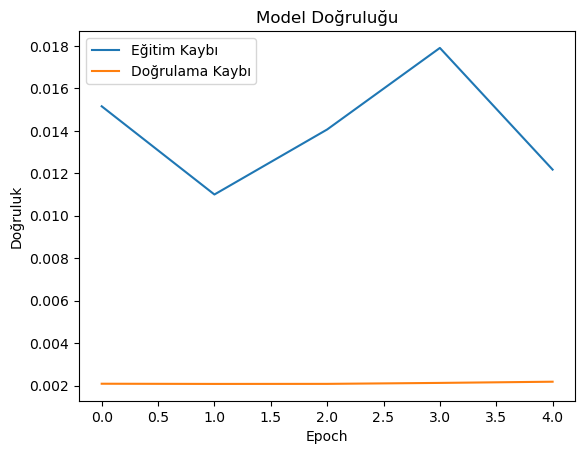

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Model Doğruluğu')
plt.show()

# MODELE TAHMİN YAPTIRILMASI

In [45]:
# 1. Modelin tahminlerini yapma
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Tahmin edilen sınıflar

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


# CONFUSİON MATRİSİN ÇİZDİRİLMESİ

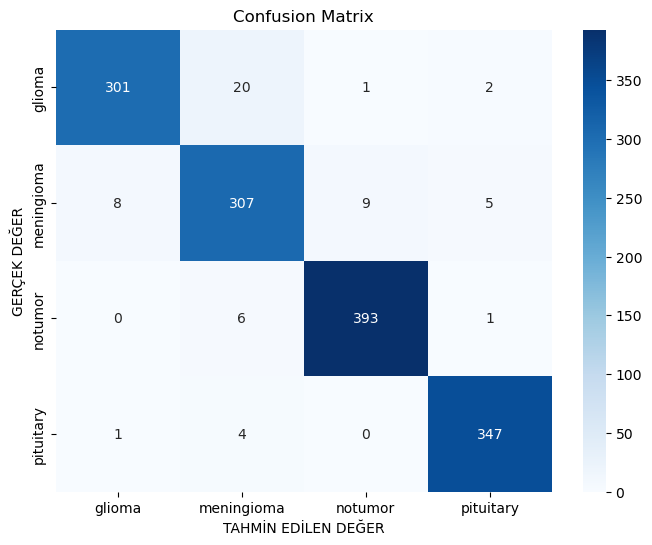

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# 2. Confusion Matrix Hesaplama
cm = confusion_matrix(y_test, y_pred_classes)

# 3. Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('TAHMİN EDİLEN DEĞER')
plt.ylabel('GERÇEK DEĞER')
plt.title('Confusion Matrix')
plt.show()



# TÜMÖR DAĞILIMININ BAR GRAFİKTE GÖSTERİLMESİ

C:\Users\atunc\AppData\Local\Temp\ipykernel_3088\939884285.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


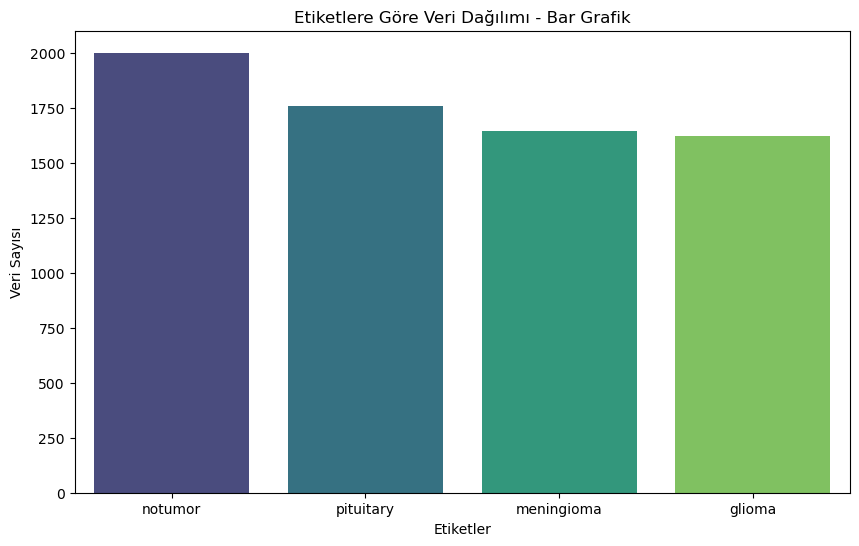

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Veri setini yükleyin
file_path = "harris_kose_pixelli_veri_seti.csv"  # CSV dosya yolu
data = pd.read_csv(file_path)

# Etiketleri ve piksel değerlerini ayırma
X = data.iloc[:, :-1]  # Piksel değerleri (son sütun hariç)
y = data.iloc[:, -1]   # Etiketler (son sütun)

# Piksel değerlerini normalleştir
X = X / 255.0

# Veri setine etiketleri ekleyelim
X_df = pd.DataFrame(X)
X_df['label'] = y

# Etiketlere göre veri sayısını hesaplayalım
label_counts = X_df['label'].value_counts()

# Bar grafiğini çizme
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Etiketlere Göre Veri Dağılımı - Bar Grafik")
plt.xlabel("Etiketler")
plt.ylabel("Veri Sayısı")
plt.show()


# PASTA DİLİMİ GRAFİĞİNDE GÖSTERİLMESİ

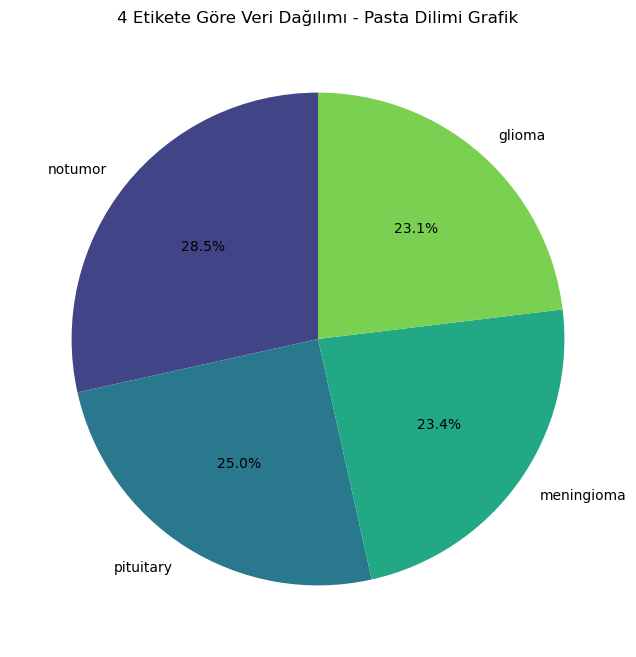

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Veri setini yükleyin
file_path = "harris_kose_pixelli_veri_seti.csv"  # CSV dosya yolu
data = pd.read_csv(file_path)

# Etiketleri ve piksel değerlerini ayırma
X = data.iloc[:, :-1]  # Piksel değerleri (son sütun hariç)
y = data.iloc[:, -1]   # Etiketler (son sütun)



# Piksel değerlerini normalleştir
X = X / 255.0

# Veri setine etiketleri ekleyelim
X_df = pd.DataFrame(X)
X_df['label'] = y

# Etiketlere göre veri sayısını hesaplayalım
label_counts = X_df['label'].value_counts()

# Seaborn renk paleti
colors = sns.color_palette("viridis", len(label_counts))

# Pasta dilimi grafik oluşturma
plt.figure(figsize=(8, 8))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("4 Etikete Göre Veri Dağılımı - Pasta Dilimi Grafik")
plt.axis()  
plt.show()


# ROC EĞRİSİ ÜZERİNDEN SINIFLANDIRMALARI MODELİN NE KADAR DOĞRU YAPILDIĞININ BELİRLENMESİ VE ANALİZİ

Class 2 ve Class 3'ün %100 doğruluğu, modelin bu sınıfları mükemmel bir şekilde sınıflandırdığını gösteriyor. Bu genellikle modelin bu sınıfları ayırt etmekte çok iyi olduğunu gösterir.
Class 0 ve Class 1'in %99 ve %98 doğruluk oranları, bu sınıfların da oldukça doğru bir şekilde sınıflandırıldığını gösterir. Ancak, küçük bir hata payı var.

Genel Yorum:

Bu tarz bir sonuç, modelin genel olarak yüksek doğruluk sağladığını ve çok az hata yaptığını gösteriyor. Ancak, modelin Class 0 ve Class 1 için biraz daha düşük doğruluk oranlarına sahip olması, bu sınıflar arasında küçük bir karışıklık veya hatalı sınıflandırma olabileceğini gösteriyor. Class 2 ve Class 3'ün %100 doğruluğu, bu sınıfların daha belirgin ya da kolayca ayırt edilebilir özelliklere sahip olduğu anlamına gelebilir.

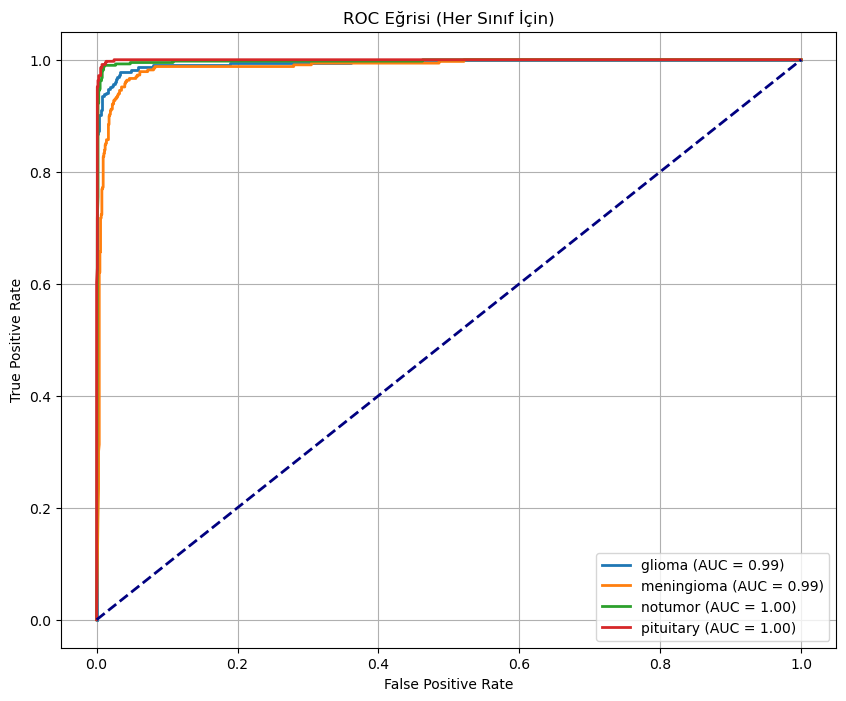

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sınıf isimlerini tanımlayın
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# ROC eğrisini çizme (her sınıf için)
plt.figure(figsize=(10, 8))

for i in range(len(class_names)):  # Her sınıf için ROC eğrisi
    # Sınıfın gerçek etiketlerini binary olarak alıyoruz
    binary_y_test = np.where(y_test == i, 1, 0)  # Pozitif sınıf: i
    fpr, tpr, _ = roc_curve(binary_y_test, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Diagonal çizgi (rastgele tahmin)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafiği etiketleme
plt.title('ROC Eğrisi (Her Sınıf İçin)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# PRECİSİON,RECALL,F1SCORE,SUPPORT DEĞERLERİNİN ANALİZ EDİLMESİ

    Genel Başarı (Accuracy):
        Accuracy değeri 0.96 (yani %96) olarak verilmiş. Bu, modelin tüm verisetinde doğru tahminlerde bulunma oranının %96 olduğunu gösteriyor. Yüksek bir doğruluk oranı, modelin genel anlamda iyi çalıştığını gösterir.

    Precision, Recall, ve F1-Score:
        Precision (kesinlik), doğru pozitiflerin toplam pozitif tahminlere oranıdır. Yüksek precision, modelin tahmin ettiği pozitif sınıfların doğru olduğuna dair güvenilir olduğunu gösterir.
        Recall (duyarlılık), doğru pozitiflerin toplam gerçek pozitiflere oranıdır. Yüksek recall, modelin gerçek pozitif sınıfları bulmada başarılı olduğunu gösterir.
        F1-Score, precision ve recall değerlerinin harmonik ortalamasıdır ve modelin genel performansını değerlendirmeye yönelik iyi bir ölçüttür. Yüksek F1 skoru, modelin her iki metriği de dengelemekte başarılı olduğunu gösterir.

Sınıf Bazında Değerlendirme:

    Glioma (348 örnek):
        Precision: 0.97, Recall: 0.94, F1-Score: 0.96
        Model, glioma sınıfında yüksek doğrulukla sınıflandırma yapıyor. Precision ve recall arasındaki küçük fark, bazı yanlış negatiflerin olabileceğini gösteriyor, ancak genel olarak çok iyi.
    Meningioma (318 örnek):
        Precision: 0.91, Recall: 0.95, F1-Score: 0.93
        Meningioma sınıfında, recall biraz daha yüksek, bu da modelin meningioma'yı doğru tespit etme konusunda iyi olduğunu ancak bazı yanlış pozitifler yapabileceğini gösteriyor (precision biraz düşük).
    Notumor (395 örnek):
        Precision: 0.97, Recall: 0.97, F1-Score: 0.97
        Notumor sınıfı, modelin en yüksek performansı gösterdiği sınıftır. Precision ve recall neredeyse eşit, bu da modelin doğru sınıflandırmada çok başarılı olduğunu gösteriyor.
    Pituitary (344 örnek):
        Precision: 0.99, Recall: 0.98, F1-Score: 0.98
        Pituitary sınıfı da oldukça iyi performans gösteriyor. Precision neredeyse mükemmel ve recall da oldukça yüksek.

Makro ve Ağırlıklı Ortalama:

    Macro Average:
        Precision: 0.96, Recall: 0.96, F1-Score: 0.96
        Bu, her bir sınıfın eşit şekilde dikkate alındığı bir değerlendirmedir. Tüm sınıfların ortalama performansı oldukça yüksek.
    Weighted Average:
        Precision: 0.96, Recall: 0.96, F1-Score: 0.96
        Bu, sınıf büyüklüklerinin dikkate alındığı bir değerlendirmedir. Yine, ağırlıklı ortalama da oldukça yüksek, bu da modelin büyük sınıflarda da doğru tahminler yaptığını gösterir.

Sonuç:

Model genel olarak çok iyi performans gösteriyor, yüksek doğruluk, precision, recall ve F1 skoru ile doğru sınıflandırmalar yapıyor. Notumor sınıfı dışında, modelin diğer sınıflarda da doğru tahminlerde bulunma oranı oldukça yüksek. Meningioma sınıfında biraz daha fazla yanlış pozitif olabilir, ancak yine de sonuçlar oldukça tatmin edici.

In [50]:
from sklearn.metrics import classification_report
import numpy as np
# Hesaplama ve yazdırma
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

      glioma       0.97      0.93      0.95       324
  meningioma       0.91      0.93      0.92       329
     notumor       0.98      0.98      0.98       400
   pituitary       0.98      0.99      0.98       352

    accuracy                           0.96      1405
   macro avg       0.96      0.96      0.96      1405
weighted avg       0.96      0.96      0.96      1405



# Cross Valdiation Uygulanması

##  K-Fold Eğitimi

## Bu kod, **K-Fold Cross Validation** yöntemini kullanarak bir modelin performansını değerlendirir. Veri seti 5 parçaya bölünür; her fold'da bir parça doğrulama için, geri kalanı eğitim için kullanılır. Model her fold'da eğitilip doğrulama doğruluğu kaydedilir. Tüm fold'ların doğruluk skorlarının ortalaması ve standart sapması hesaplanarak modelin genel başarısı ve kararlılığı değerlendirilir. Bu yöntem, modelin farklı veri bölümlerinde nasıl performans gösterdiğini ölçerek genelleme yeteneğini artırır.

In [51]:
from sklearn.model_selection import KFold
import numpy as np



# K-Fold ayarları
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Sonuçlar için liste
scores = []

# K-Fold Cross Validation
fold_no = 1
for train_index, val_index in kf.split(X_train):
    print(f"\n--- {fold_no}. Fold Başlıyor ---")
    
    # Eğitim ve doğrulama setlerini oluştur
    x_fold_train, x_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    # Modeli eğit
    history = model1.fit(
        x_fold_train, y_fold_train,
        validation_data=(x_fold_val, y_fold_val),
        epochs=5,
        batch_size=32,
        verbose=1
    )
    
    # Son doğrulama doğruluğunu kaydet
    val_accuracy = history.history['val_accuracy'][-1]
    scores.append(val_accuracy)
    print(f"Fold {fold_no} Doğruluk: {val_accuracy:.4f}")
    
    fold_no += 1

# K-Fold sonuçlarını özetle
print("\n--- K-Fold Cross Validation Sonuçları ---")
print(f"Her Fold Doğruluk: {scores}")
print(f"Ortalama Doğruluk: {np.mean(scores):.4f}")
print(f"Standart Sapma: {np.std(scores):.4f}")



--- 1. Fold Başlıyor ---
Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9974 - loss: 0.0103 - val_accuracy: 0.9982 - val_loss: 0.0032
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.9954 - loss: 0.0126 - val_accuracy: 0.9982 - val_loss: 0.0032
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9959 - loss: 0.0094 - val_accuracy: 0.9982 - val_loss: 0.0032
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9957 - loss: 0.0121 - val_accuracy: 0.9982 - val_loss: 0.0033
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9951 - loss: 0.0111 - val_accuracy: 0.9982 - val_loss: 0.0033
Fold 1 Doğruluk: 0.9982

--- 2. Fold Başlıyor ---
Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9972 - loss: 0.0080 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9971 - loss: 0.0085 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 3/5
141/141 ━━━━━━━

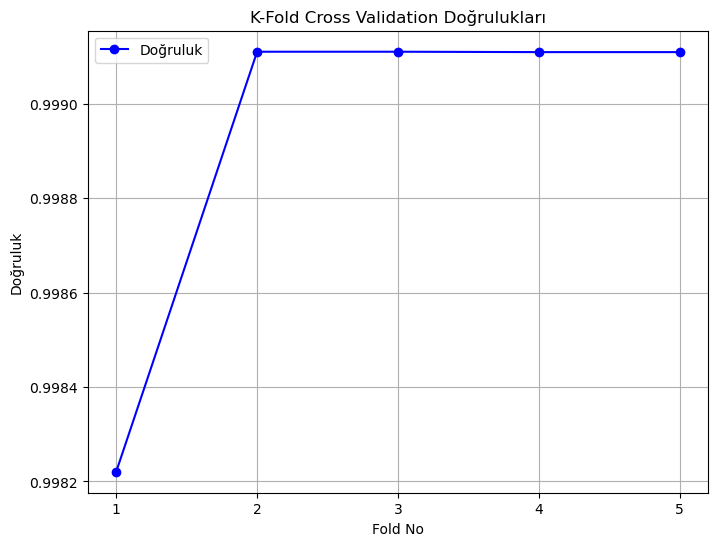

In [57]:
# K-Fold doğruluklarını grafik üzerinde göster
plt.figure(figsize=(8, 6))
plt.plot(range(1, k+1), scores, marker='o', linestyle='-', color='b', label='Doğruluk')
plt.title('K-Fold Cross Validation Doğrulukları')
plt.xlabel('Fold No')
plt.ylabel('Doğruluk')
plt.xticks(np.arange(1, k+1))
plt.grid(True)
plt.legend()
plt.show()
